In [1]:
from boost_astar import AStarOnImage
import numpy as np
import matplotlib.pyplot as plt
from random import randint, seed
import cv2

In [2]:
image = cv2.imread("/tmp/MAZE.png")[:, :, 0]

In [11]:
grid = image
# start is the first white block in the top row
start_j, = np.where(grid[0, :] == 0)
start = np.array([0, start_j[0]])

# end is the first white block in the final column
end_i, = np.where(grid[:, -1] == 0)
end = np.array([end_i[0], grid.shape[0] - 1])

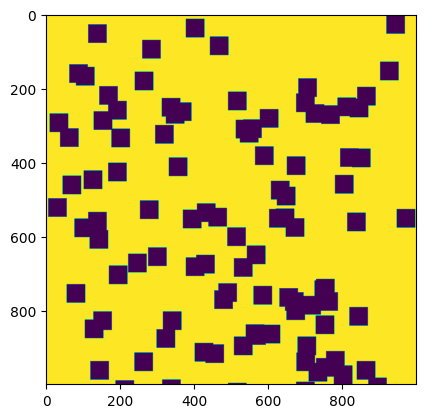

In [2]:
image = np.ones((1000, 1000), "uint8")*255

seed(9001)
for i in range(100):
    x = randint(1, image.shape[1]-2)
    y = randint(1, image.shape[0]-2)
    image[y:y+int(image.shape[1]*0.05), x:x+int(image.shape[0]*0.05)] = 0
    
image[-1, -1] = 255

plt.imshow(image)

In [3]:
%time astar = AStarOnImage(image, False)

made nodes and edges, deduplicating
CPU times: user 22.4 s, sys: 2.16 s, total: 24.6 s
Wall time: 22.9 s


In [12]:
np.array(astar.edges).shape

(3780036, 2)

In [8]:
astar.nodes[-1]

(1801, 1799)

In [13]:
%prun path = astar.plan_by_coordinates((2, 1), (1801, 1799))

CPU times: user 1.95 s, sys: 66 ms, total: 2.02 s
Wall time: 2.01 s
Path length 10036


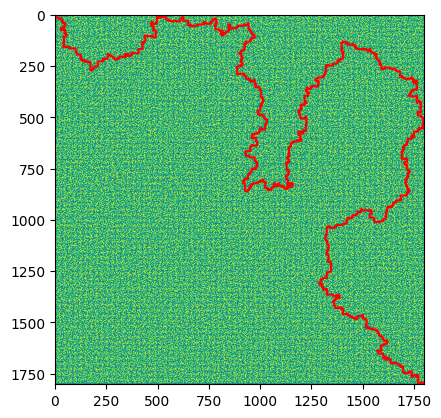

In [9]:

plt.imshow(image)
plt.plot(*zip(*path), "r-")
print("Path length", len(path))

In [14]:
%time astar = AStarOnImage(image, True)

made nodes and edges, deduplicating
CPU times: user 34 s, sys: 1.13 s, total: 35.1 s
Wall time: 35 s


CPU times: user 2.37 s, sys: 4.5 ms, total: 2.37 s
Wall time: 2.36 s
Path length 7331


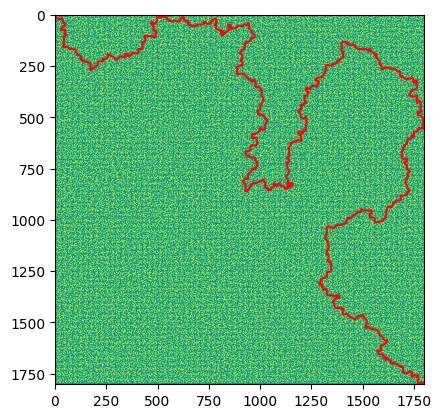

In [18]:
%time path = astar.plan_by_coordinates((2, 1), (1801, 1799))
plt.imshow(image)
plt.plot(*zip(*path), "r-")
print("Path length", len(path))